# Churn prediction model

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

In [3]:
orders_path = '../orders_churn.csv'

df_orders = pd.read_csv(orders_path)

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75835 entries, 0 to 75834
Data columns (total 12 columns):
Customer number       75835 non-null int64
T_between_orders      75835 non-null float64
Number of orders      75835 non-null int64
Average rating        75835 non-null float64
Percentage returns    75835 non-null float64
EDT                   75835 non-null float64
ADT                   75835 non-null float64
EDT_divided_ADT       75835 non-null float64
Man                   75835 non-null float64
Woman                 75835 non-null float64
Age                   75835 non-null int64
Churn                 75835 non-null float64
dtypes: float64(9), int64(3)
memory usage: 6.9 MB


In [21]:
keyCol = 'Customer number'
targetCol = 'Churn'
columns = ['T_between_orders', 'Percentage returns', 'EDT_divided_ADT']

train,test = train_test_split(df_orders,test_size = .25 ,random_state = 111)

#independent = [i for i in df_orders.columns if i not in keyCol + targetCol]

train_X = train[columns]
train_Y = train[targetCol]

test_X  = test[columns]
test_Y  = test[targetCol]

In [22]:
scoring = 'accuracy'
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=111)
   cv_results = model_selection.cross_val_score(model, train_X, train_Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

Logistic Regression: 0.881725 (0.004959)
KNN: 0.868679 (0.006437)
Random Forest: 0.869136 (0.005293)
Decision Tree: 0.788698 (0.004475)
Gaussian NB: 0.881725 (0.004959)


[]

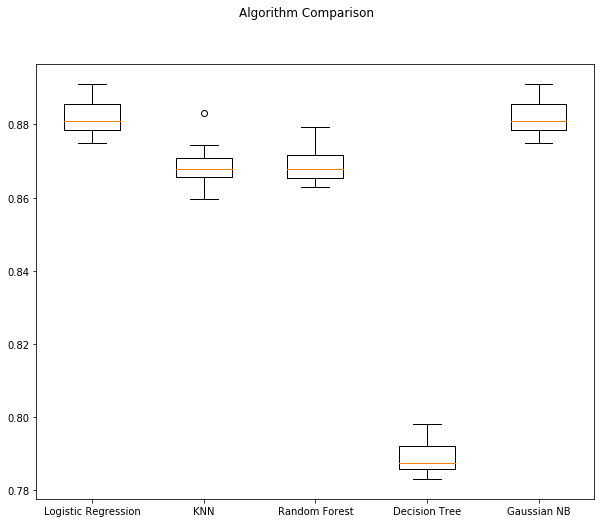

In [23]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

## Digging into the Logistic Regression algorithm

In [16]:
model = LogisticRegression()
model.fit(train_X, train_Y)
predictions = model.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
df_cm = pd.DataFrame(cm)

print("Accuracy score: ", accuracy_score(test_Y, predictions), "\n")
print("Confusion matrix:\n", df_cm, "\n")
print("Classification report:\n", classification_report(test_Y, predictions))

Accuracy score:  0.8820085447544702 

Confusion matrix:
        0  1
0  16720  2
1   2235  2 

Classification report:
              precision    recall  f1-score   support

        0.0       0.88      1.00      0.94     16722
        1.0       0.50      0.00      0.00      2237

avg / total       0.84      0.88      0.83     18959

